# TAL Labo 1c : mêmes opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [1]:
import nltk
import os
import re
from urllib import request
import matplotlib.pyplot 
%matplotlib inline
if not os.path.exists('Texts'):
    os.makedirs('Texts')
if not os.path.exists('Data'):
    os.makedirs('Data')

S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [2]:
url2 = "https://en.wikipedia.org/wiki/Switzerland" 
response = request.urlopen(url2)
html2 = response.read().decode('utf8')
print('La longueur de la chaine obtenue est :', len(html2))

La longueur de la chaine obtenue est : 860763


Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le contenu de la page est stocké dans `html2`, nous extrayons le texte dans `raw2`.

In [3]:
from bs4 import BeautifulSoup

In [4]:
raw2 = BeautifulSoup(html2).get_text()

Réutilisez la méthode de la partie 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse ("ne parle pas de la Suisse").  Quelle est la longueur du résultat ? Afficher aussi ses 100 premiers et 100 derniers caractères (p.ex. `raw2trimmed`).

In [5]:
# Please write your Python code below and execute it.
start_of_text = "Switzerland, officially the Swiss Confederation"
end_of_text = "The Merlot is the main variety produced in Ticino"
start_index = raw2.index(start_of_text)
end_index = raw2.index(end_of_text) + len(end_of_text)
raw2trimmed = raw2[start_index : end_index]
print(raw2trimmed[0:100])
print(raw2trimmed[-100:])
len(raw2trimmed)

Switzerland, officially the Swiss Confederation, is a landlocked country at the confluence of Wester
asselas (called Fendant in Valais) and Pinot noir. The Merlot is the main variety produced in Ticino


98332

Effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Ecrivez le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [6]:
filename = "./Texts/sample_web_page.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)
fd = open(filename, 'a', encoding='utf8')
# Please write your Python code below and execute it.
raw2trimmed = raw2trimmed.replace('\r\n', ' ').replace('"', '')
raw2trimmed = re.sub("\[.*\]", '', raw2trimmed)
book2sentences = nltk.sent_tokenize(raw2trimmed)
tokenizedSentences= [nltk.word_tokenize(sentence) for sentence in book2sentences]
for line in tokenizedSentences:
    fd.write(" ".join(line))
    fd.write('\n')
fd.close()

Effectuer maintenant la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [7]:
# Please write your Python code below and execute it.
words2 = nltk.word_tokenize(raw2trimmed)
len(words2)

11780

Créez un objet de type nltk.Text à partir de la liste de *tokens* `words2`.  Appliquez-lui à titre d'exemple les méthodes `concordance`, `similar` et `collocations`. 

In [8]:
# Please write your Python code below and execute it.
text2 = nltk.Text(words2)
text2.concordance('cantons')
text2.similar('land')
text2.collocations()

Displaying 25 of 33 matches:
4 Politics 4.1 Direct democracy 4.2 Cantons 4.2.1 Municipalities 4.3 Foreign re
d territory , one of the Waldstätte cantons which formed the nucleus of the Old
by nobles and patricians of various cantons , facilitated management of common 
lier . By 1353 , the three original cantons had joined with the cantons of Glar
riginal cantons had joined with the cantons of Glarus and Zug and the Lucerne ,
ict between Catholic and Protestant cantons persisted , erupting in further vio
nd introduced a Confederation of 19 cantons . In 1815 the Congress of Vienna fu
in Bern ( 1857 ) . One of the three cantons presiding over the Tagsatzung ( for
roke out in 1847 when some Catholic cantons tried to set up a separate alliance
rvative current , realised that the cantons would profit more if their economic
central authority while leaving the cantons the right to self-government on loc
those who favoured the power of the cantons ( the Sonderbund Kantone ) , the na
omen the ri

Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant la liste des _tokens_ en un `set`.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [9]:
# Please write your Python code below and execute it.
vocabulary = set(words2)
print(len(vocabulary))
filtered = filter(lambda x : len(x) > 15, vocabulary)
list(filtered)

3153


['Switzerland–European',
 'Telecommunication',
 'commander-in-chief',
 'Basel-Landschaft',
 'regions.Agricultural',
 'autobahn/autoroute',
 'instruments/watches',
 'energy-producing',
 'Romansh-speaking',
 'electricity-generating',
 'machines/electronics',
 'Sonderbundskrieg',
 'authoritarianism',
 'General-in-Chief',
 'Gallen-Altenrhein',
 'SwitzerlandSwiss',
 'Hydroelectricity',
 'hydroelectricity',
 'Donau-Iller-Rhine-Limes']

Construisez un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [10]:
# Please write your Python code below and execute it.
wordsMin = list(map(lambda x : x.lower() if x.isalpha() else x, words2))
freqdist2 = nltk.FreqDist(wordsMin)
freqdist2.most_common(30)

[('the', 910),
 (',', 586),
 ('of', 463),
 ('.', 409),
 ('and', 349),
 ('in', 329),
 ('(', 186),
 (')', 183),
 ('switzerland', 178),
 ('to', 148),
 ('a', 147),
 ('swiss', 143),
 ('is', 105),
 ('are', 77),
 ('federal', 75),
 ('%', 75),
 ('as', 74),
 ('for', 68),
 ('was', 58),
 ('from', 56),
 ('by', 55),
 (':', 53),
 ('with', 51),
 ("'s", 49),
 ('has', 44),
 ('at', 41),
 ('an', 40),
 ('world', 40),
 ('on', 39),
 ('it', 36)]

Affichez le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

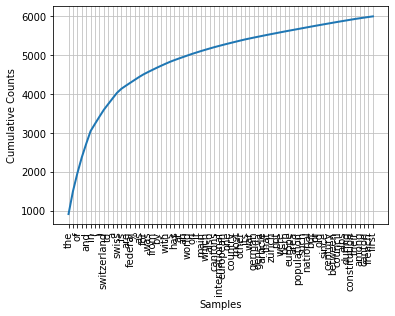

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [11]:
# Please write your Python code below and execute it.
freqdist2.plot(70, cumulative=True)

Construisez une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

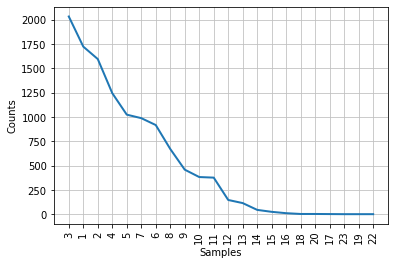

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
# Please write your Python code below and execute it.
lengthList = map(len,words2)
freqdistLen = nltk.FreqDist(lengthList)
freqdistLen.plot(100)

## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1b et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 